# In-Class Activity 2

This report is a python notebook exported to pdf
- Output of Q1 is in the notebook itself
- Output of Q2 was written to `output.tsv` and the contents of the file are shown at the end of this report
- The short note is written in the last cell of this notebook

In [1]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
from collections import Counter
# Number of tokens (N) = 36421
# vocab = no. of types (V) = 4789
N = 36421
V = 4789

[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/bitmap4/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


## Q1

In [2]:
k = V/(N**0.7)
print(k)

3.0711323372838546


## Q2

In [10]:
tokens = gutenberg.words('shakespeare-hamlet.txt')
# tokens = [w.lower() for w in tokens]              # lowercasing gives different rankings than the ones shown in the activity pdf, otherwise the results are the same except ties
types = set(tokens)
# unsorted_ranked = [[t, tokens.count(t)] for t in types]
unsorted_ranked = Counter(tokens)
# ranked = sorted(unsorted_ranked, key=lambda x: x[1], reverse=True)
ranked = unsorted_ranked.most_common()
print(ranked[:10])

[(',', 2892), ('.', 1886), ('the', 860), ("'", 729), ('and', 606), ('of', 576), ('to', 576), (':', 565), ('I', 553), ('you', 479)]


In [16]:
# Predicted Freq = (1/rank)/s
# where s = number of types / N
s = sum(1/n for n in range(1, V+1))
total_tokens = len(tokens)
actual = [tok[1]/total_tokens for tok in ranked]
predicted = [(1/(i+1))/s for i in range(len(ranked))]
f = open("output.tsv", "w")
f.write("Type\tRank\tPredicted Relative Frequency\tActual Relative Frequency\n")
for i, tok in enumerate(ranked):
    rank = i+1
    f.write(f"{tok[0]}\t{rank}\t{predicted[i]}\t{actual[i]}\n")
f.close()

## Extra credit

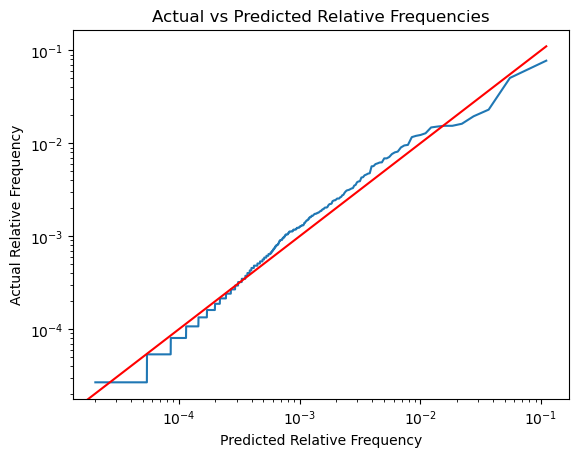

In [51]:
# draw a graph of actual vs predicted frequencies
from matplotlib import markers
import matplotlib.pyplot as plt
plt.xscale('log')
plt.yscale('log')
plt.plot(predicted, actual, markersize=3)
upper = max([0, predicted[0]], [0, actual[0]])
plt.plot(upper, upper, 'r')
plt.xlabel('Predicted Relative Frequency')
plt.ylabel('Actual Relative Frequency')
plt.title('Actual vs Predicted Relative Frequencies')
plt.show()

### Short Note

The plot compares the predicted relative frequencies with the actual relative frequencies of words in the Hamlet corpus. The red line represents the ideal case where the predicted and actual values match perfectly, indicating a good fit.

From the plot, we observe that for lower-frequency words (those closer to the bottom-left part of the plot), the predicted and actual values align closely with the red line, indicating a strong fit. However, for higher-frequency words (towards the top-right part of the plot), there is a noticeable deviation from the red line (as in, the numerical values, better demonstrated on a linear scale), suggesting that the prediction model underestimates the frequency of the most common words in this case.

Overall, while the model performs well, there are discrepancies for the most frequent tokens.

In [14]:
!cat output.tsv

Type	Rank	Predicted Relative Frequency	Actual Relative Frequency
,	1	0.11048018373142775	0.07740899357601713
.	2	0.055240091865713874	0.050481798715203426
the	3	0.036826727910475913	0.023019271948608137
'	4	0.027620045932856937	0.01951284796573876
and	5	0.02209603674628555	0.016220556745182014
of	6	0.018413363955237957	0.015417558886509636
to	7	0.015782883390203964	0.015417558886509636
:	8	0.013810022966428468	0.015123126338329764
I	9	0.012275575970158638	0.014801927194860814
you	10	0.011048018373142775	0.01282119914346895
?	11	0.010043653066493432	0.012285867237687367
a	12	0.009206681977618978	0.012018201284796574
my	13	0.00849847567164829	0.011643468950749464
in	14	0.007891441695101982	0.009609207708779443
it	15	0.0073653455820951825	0.009475374732334048
Ham	16	0.006905011483214234	0.0090203426124197
is	17	0.006498834337142809	0.008137044967880086
;	18	0.006137787985079319	0.00797644539614561
not	19	0.0058147465121804074	0.007655246252676659
his	20	0.0055240091865713875	0.00711991434